In [ ]:
# 워드클라우드
# 데이터준비

!pip install wordcloud
!pip install matplotlib
!pip install pillow
!pip install numpy

In [9]:
import pandas as pd
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
mask = np.array(Image.open("ios.png"))

In [11]:
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [12]:
f=open('morph.txt','r',encoding='utf8')
txt=f.readlines()
f.close()

In [13]:
txt

['[\n',
 '이데일리\n',
 '스타\n',
 'in\n',
 '김가영\n',
 '기자\n',
 ']\n',
 '보이\n',
 '그룹\n',
 'A\n',
 '.\n',
 'C\n',
 '.\n',
 'E\n',
 '(\n',
 '에이스\n',
 ')\n',
 '가\n',
 '신곡\n',
 '‘\n',
 '도깨비\n',
 '(\n',
 'Favorite\n',
 'Boys\n',
 ')’\n',
 '로\n',
 '매혹\n',
 '적\n',
 '인\n',
 '무대\n',
 '를\n',
 '완성\n',
 '했다\n',
 '.\n',
 '\n',
 '\n',
 '\n',
 '이미지\n',
 '원\n',
 '본보기\n',
 '\n',
 '\n',
 '에이스\n',
 '(\n',
 '사진\n',
 '=\n',
 'MBC\n',
 ')\n',
 '\n',
 '\n',
 '26일\n',
 '오후\n',
 '방송\n',
 '된\n',
 'MBC\n',
 '‘\n',
 '쇼\n',
 '음악중심\n',
 '’\n',
 '에\n',
 '출연\n',
 '한\n',
 '에이스\n',
 '는\n',
 '신곡\n',
 '‘\n',
 '도깨비\n',
 '(\n',
 'Favorite\n',
 'Boys\n',
 ')’\n',
 '의\n',
 '무대\n',
 '를\n',
 '꾸몄다\n',
 '.\n',
 '에이스\n',
 '는\n',
 '흰\n',
 '한복\n',
 '위\n',
 '멤버\n',
 '들\n',
 '의\n',
 '개성\n',
 '에\n',
 '맞춘\n',
 '다\n',
 '채\n',
 '로운\n',
 '컬러\n',
 '의\n',
 '두루마기\n',
 '로\n',
 '한국\n',
 '적\n',
 '인\n',
 '멋\n',
 '을\n',
 '연출\n',
 '했고\n',
 '‘\n',
 '도깨비\n',
 '(\n',
 'Favorite\n',
 'Boys\n',
 ')’\n',
 '의\n',
 '강렬한\n',
 '사운드\n',
 '에\n',
 '맞춘\n',
 '칼\n',
 '군

In [14]:
new_txt =[]
for i in txt:
  new_txt.append(i.replace('\n',''))

In [15]:
new_txt

['[',
 '이데일리',
 '스타',
 'in',
 '김가영',
 '기자',
 ']',
 '보이',
 '그룹',
 'A',
 '.',
 'C',
 '.',
 'E',
 '(',
 '에이스',
 ')',
 '가',
 '신곡',
 '‘',
 '도깨비',
 '(',
 'Favorite',
 'Boys',
 ')’',
 '로',
 '매혹',
 '적',
 '인',
 '무대',
 '를',
 '완성',
 '했다',
 '.',
 '',
 '',
 '',
 '이미지',
 '원',
 '본보기',
 '',
 '',
 '에이스',
 '(',
 '사진',
 '=',
 'MBC',
 ')',
 '',
 '',
 '26일',
 '오후',
 '방송',
 '된',
 'MBC',
 '‘',
 '쇼',
 '음악중심',
 '’',
 '에',
 '출연',
 '한',
 '에이스',
 '는',
 '신곡',
 '‘',
 '도깨비',
 '(',
 'Favorite',
 'Boys',
 ')’',
 '의',
 '무대',
 '를',
 '꾸몄다',
 '.',
 '에이스',
 '는',
 '흰',
 '한복',
 '위',
 '멤버',
 '들',
 '의',
 '개성',
 '에',
 '맞춘',
 '다',
 '채',
 '로운',
 '컬러',
 '의',
 '두루마기',
 '로',
 '한국',
 '적',
 '인',
 '멋',
 '을',
 '연출',
 '했고',
 '‘',
 '도깨비',
 '(',
 'Favorite',
 'Boys',
 ')’',
 '의',
 '강렬한',
 '사운드',
 '에',
 '맞춘',
 '칼',
 '군무',
 '퍼포먼스',
 '와',
 '중독',
 '적',
 '인',
 '사운드',
 '로',
 '이목',
 '을',
 '집중',
 '시켰다',
 '.',
 '',
 '',
 '',
 '네',
 '번째',
 '미니앨범',
 '‘',
 '호',
 '접지',
 '몽',
 '’',
 '의',
 '타이틀곡',
 '인',
 '‘',
 '도깨비',
 '(',
 'Favorite',
 'Boys',
 ')’',
 '

In [16]:
str_txt = ''
for i in new_txt:
  str_txt = str_txt + i + ' '

In [17]:
str_txt

'[ 이데일리 스타 in 김가영 기자 ] 보이 그룹 A . C . E ( 에이스 ) 가 신곡 ‘ 도깨비 ( Favorite Boys )’ 로 매혹 적 인 무대 를 완성 했다 .    이미지 원 본보기   에이스 ( 사진 = MBC )   26일 오후 방송 된 MBC ‘ 쇼 음악중심 ’ 에 출연 한 에이스 는 신곡 ‘ 도깨비 ( Favorite Boys )’ 의 무대 를 꾸몄다 . 에이스 는 흰 한복 위 멤버 들 의 개성 에 맞춘 다 채 로운 컬러 의 두루마기 로 한국 적 인 멋 을 연출 했고 ‘ 도깨비 ( Favorite Boys )’ 의 강렬한 사운드 에 맞춘 칼 군무 퍼포먼스 와 중독 적 인 사운드 로 이목 을 집중 시켰다 .    네 번째 미니앨범 ‘ 호 접지 몽 ’ 의 타이틀곡 인 ‘ 도깨비 ( Favorite Boys )’ 는 강렬한 신스 사운드 와 레트로 하우스 가 결합 된 곡 이다 . 감정 을 마음껏 표 출 할 수 없는 현실 에서 대중 들 이 원하는 단 하나 의 이상형 으로 다시 태어나겠다는 메시지 를 담았다 . 에이스 는 ‘ 도깨비 ( Favorite Boys )’ 를 통해 자신 들 만의 ‘ 한국 적 판타지 ’ 와 현대 적 퍼포먼스 를 조화롭게 녹여내며 국내외 에서 돌풍 을 일으키고 있다 .    한편 이 날 ‘ 음악중심 ’ 에는 에이스 ( A . C . E ) 를 비롯 해 더보이즈 , 에버 글 로우 , Stray Kids , 유아 ( 오 마이걸 ), 문 빈 & 산하 ( ASTRO ), TREASURE 등 이 출연 했다 .    김가영 ( kky1209@edaily.co.kr )    ▶ #24시간 빠른 #미리보는 뉴스 #궁금하냥 ? 바로 오시 개 !   ▶ 네이버 에서 \' 이데일리 뉴스 \' 를 만나 보세요   ▶ 빡침 해소 , 청춘 뉘 우스 \' 스냅 타임 \'     ＜ⓒ 함께 만들고 함께 즐기는 엔터테인먼트 포털 스타 in - 무단 전 재 & 재 배포 금지 ＞ 양궁 국가대표 선 발전 ( 원주 = 연합뉴스 ) 김영인 기자 = 14일 강원 

In [18]:
from collections import Counter
Counter(new_txt).most_common()

[('', 2020),
 ('.', 946),
 ('을', 784),
 ('이', 587),
 ('를', 469),
 ('에', 430),
 (',', 392),
 ("'", 364),
 ('의', 331),
 ('에서', 252),
 ('은', 218),
 ('는', 198),
 ('글로벌', 189),
 ('으로', 188),
 ('했다', 186),
 ('것', 186),
 ('가', 184),
 ('들', 184),
 ('"', 174),
 ('(', 168),
 ('수', 167),
 ('한', 158),
 ('에이스', 156),
 ('로', 152),
 ('과', 146),
 (')', 140),
 ('등', 138),
 ('재', 132),
 ('침대', 129),
 ('에이스침대', 129),
 ('점', 123),
 ('적', 114),
 ('인', 113),
 ('최원영', 105),
 ('세계', 99),
 ('경기', 99),
 ('기사', 99),
 ('고', 95),
 ('팀', 90),
 ('시장', 90),
 ('언론사', 90),
 ('전', 84),
 ('0', 84),
 ('도', 83),
 ('‘', 82),
 ('한국', 81),
 ('3', 78),
 ('있다', 76),
 ('및', 75),
 ('업체', 75),
 ('와', 74),
 ('이다', 70),
 ('GS', 70),
 ('가구', 69),
 ('펫', 69),
 ('득점', 66),
 ('문준', 66),
 ('쿵푸', 66),
 ('무단', 63),
 ('배포', 63),
 ('금지', 63),
 ('쿼터', 63),
 ('메인', 63),
 ('경제', 63),
 ('기록', 60),
 ('며', 60),
 ('밀라노', 60),
 ('관', 60),
 ('기자', 57),
 ('해', 57),
 ('바로', 57),
 ('리바운드', 57),
 ('골밑', 57),
 ('이탈리아', 57),
 ('개발', 57),
 ('할', 56),
 ('지난'

In [19]:
stop = ['','.','을','이','를','에',',',"'",'의','에서','은','는','으로','했다','가','들','"','(','한',')','과','로','것','적','수','인']
stopwords=set(stop)

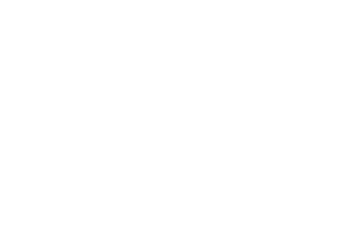

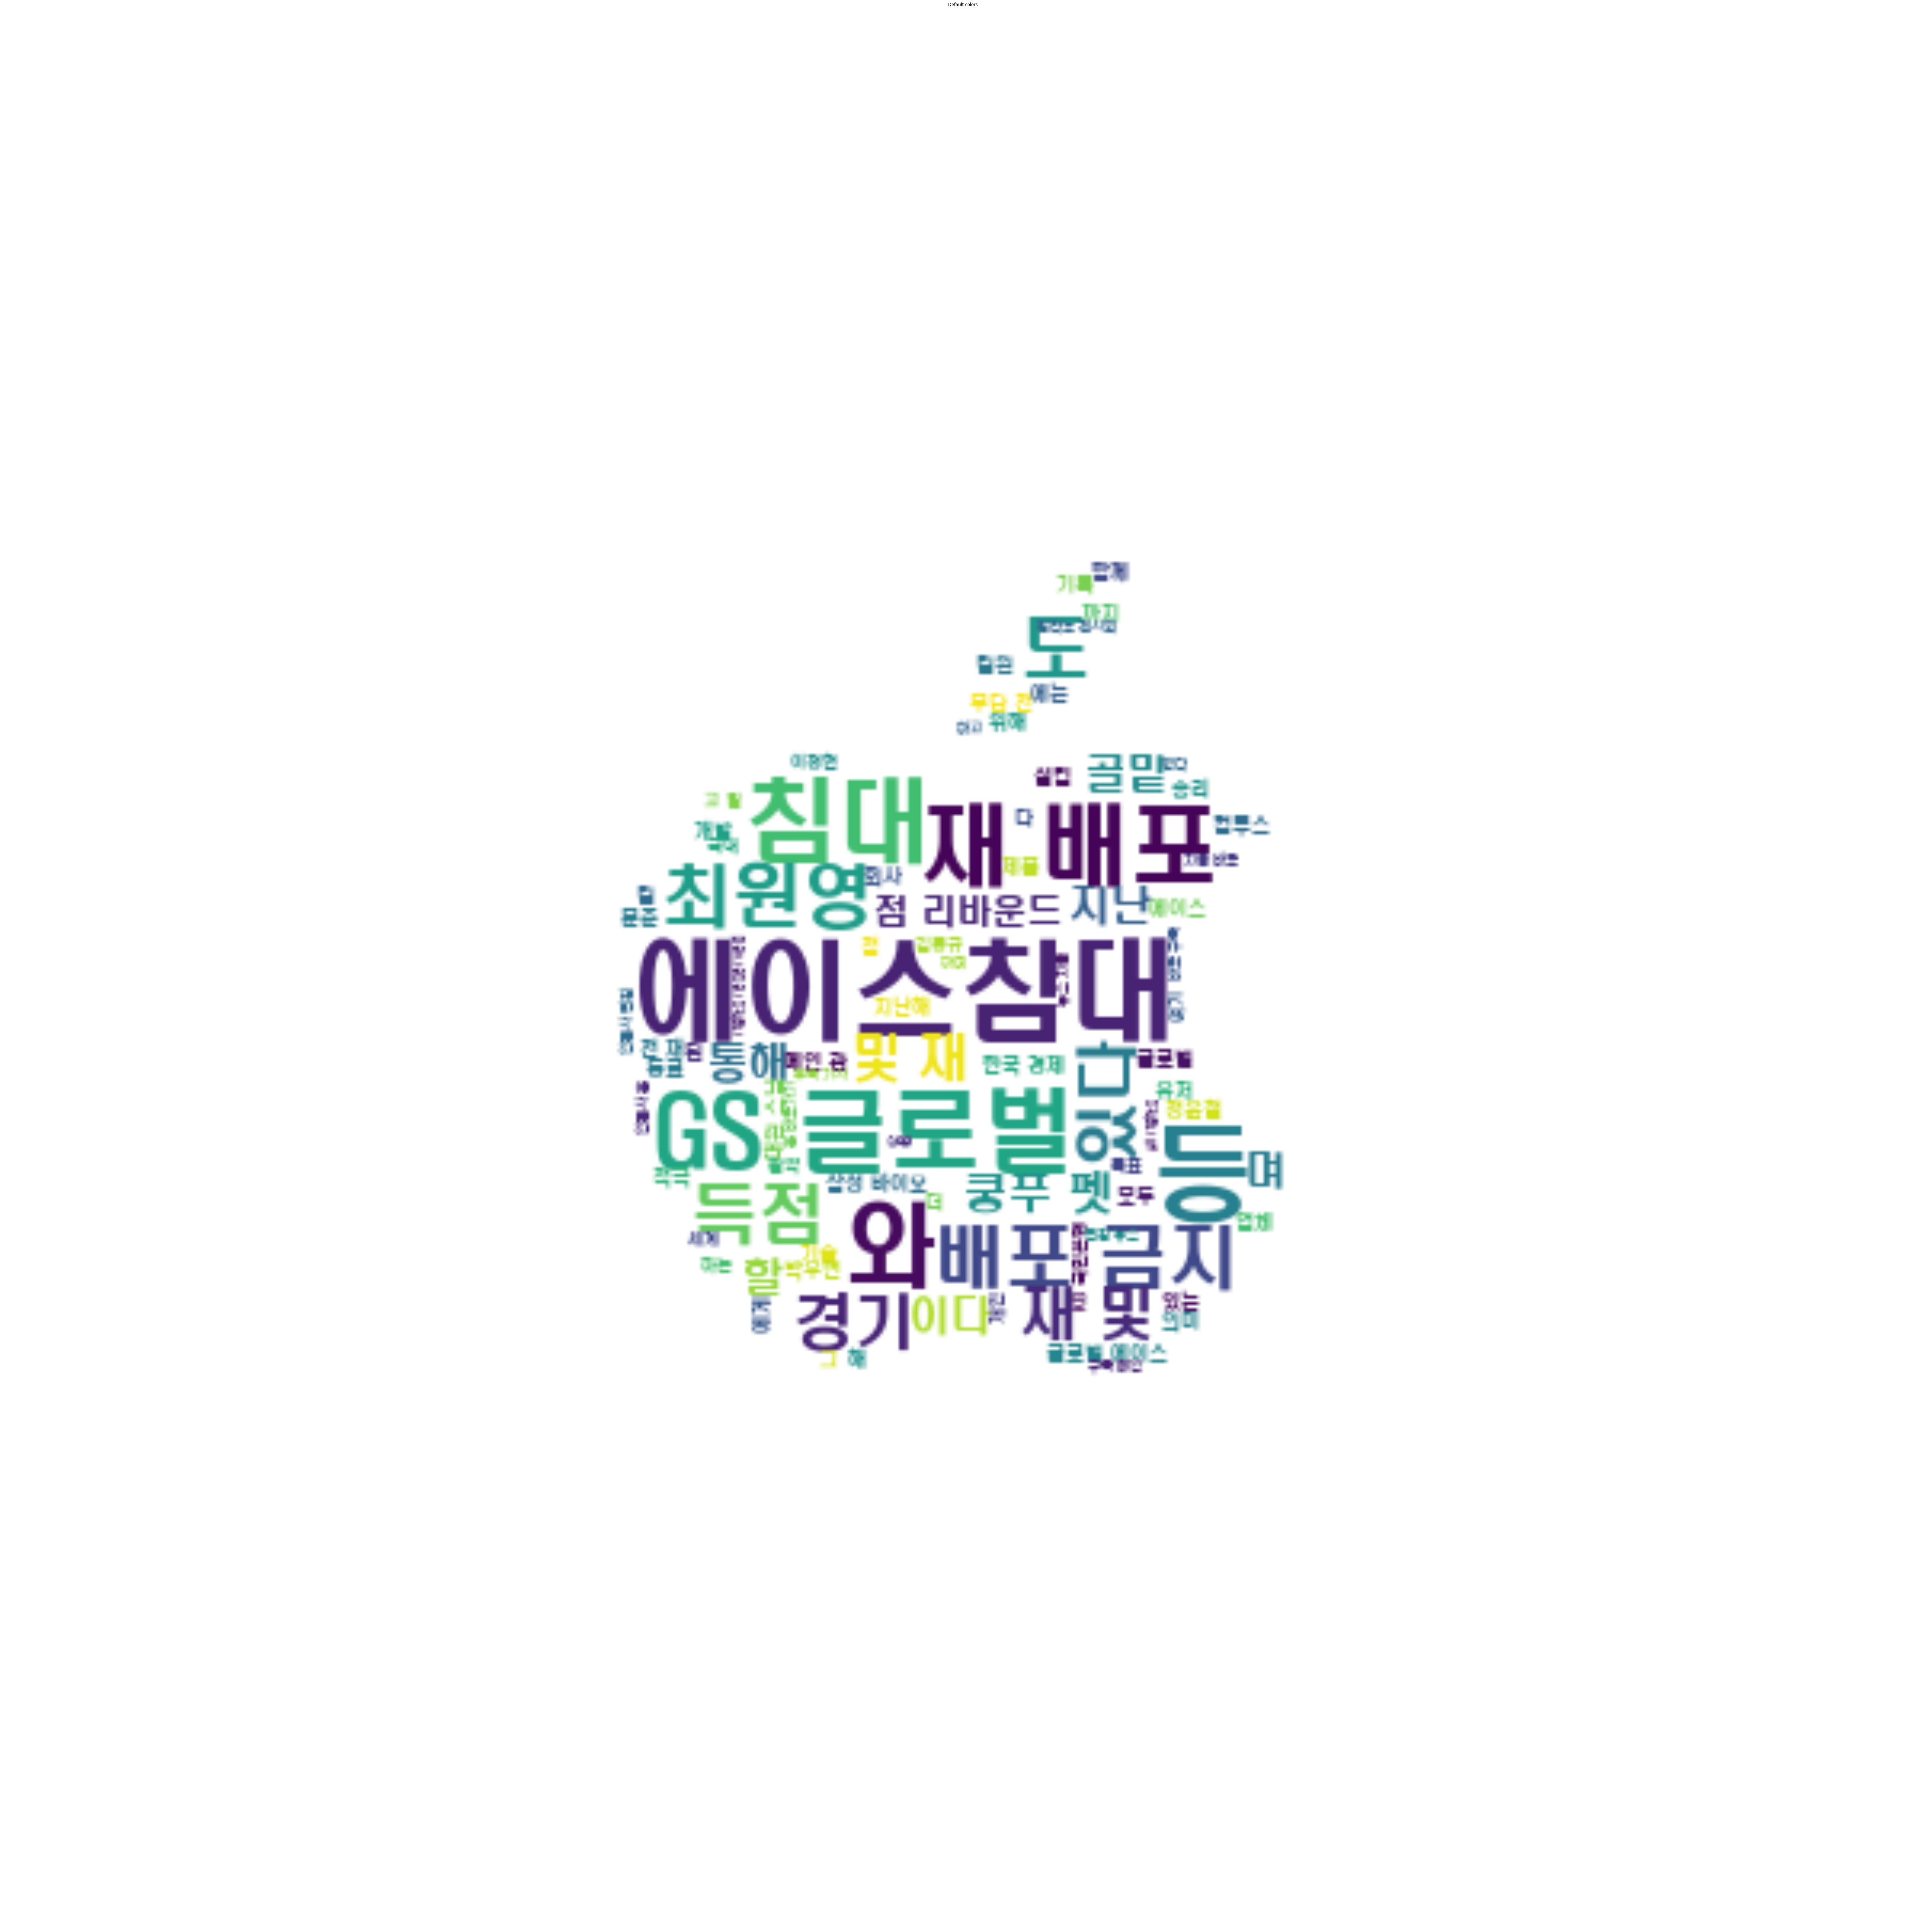

In [28]:
wc = WordCloud(font_path ='‪C:/Windows/Fonts/H2HDRM.TTF',max_words=300, mask=mask, stopwords=stopwords, margin=1,
               random_state=1,background_color='white',contour_color="white",width=1000, height=800).generate(str_txt)

wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure(figsize=(100,100))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()